In [51]:
import pandas as pd

Import and Create List of Youtube Channels

In [52]:
youtubers = pd.read_csv("youtube_videos.csv")
ytChannels = youtubers['Channel Name'].unique()
for ytc_index in range(len(ytChannels)):
    ytChannels[ytc_index] = ytChannels[ytc_index].lower()

ytChannels

array(['markiplier', 'dantdm', 'ctop', 'camodo gaming',
       'sam tabor gaming', 'johny shows', 'gawbe', 'ken_dallah_gaming',
       'playstation', 'paqpa', 'gtlive', 'xbox', 'stovetop studios',
       'efthedutch', 'csúb - az űrmedve', 'jacksepticeye', 'fgteev',
       'игровой канал чарли фрая', 'handofblood', 'fynnpire',
       'mastah_pete', 'xenomancer', 'machineplays', 'zackapple427',
       'obit', 'gq games', 'beautiful ob', 'windy31', 'aci gamespot',
       'oyuncu aile', 'zony', 'horizontalduck', 'throneful',
       'nintendo of america', 'rtgame', 'i dream of indie games',
       'notverlis', 'playstation europe', 'streat', 'chove93',
       'wanderbots', 'quarterjade', 'limx dynamics', 'squeezie gaming',
       'vitec ► play', 'colas', 'failboat', 'крошка ева',
       'biomechatronics and intelligent robotics lab', 'xuhu gaming',
       'beefy smash doods', 'playerinsidue', 'alexander zynx',
       'nerdilandia', 'quitschi', 'jhs', 'k4sen / かせん',
       'ut human centered

### Import processed Reddit Data and check youtubers against youtube related Data

In [54]:
csv_addresses = ['Bopl_Battle data\processed_youtube_relevant_Bopl_Battle.csv',
                 'crabgame data\processed_youtube_relevant_crabgame.csv', 
                 'Partyanimals data\processed_youtube_relevant_PartyAnimalsGame.csv', 
                 'RatzInstagib data\processed_youtube_relevant_RatzInstagib.csv', 
                 'worms data\processed_youtube_relevant_worms.csv']

#create dict to count youtuber appearences
youtuber_related_post_dict = {}

for csv_file in csv_addresses:
    #check if a youtuber appears in a title or body of a reddit post
    #if so increase their count by 1 in youtuber_related_post_dict   
    
    for y in ytChannels:
        current_file = pd.read_csv(csv_file)
        for t in current_file['title']:
            if type(t) == str:
                t = t.lower() 
                tokenised = t.split(" ") 
                if y in tokenised: 
                    if y not in youtuber_related_post_dict.keys():
                        youtuber_related_post_dict[y] = 1
                    else: 
                        youtuber_related_post_dict[y] = youtuber_related_post_dict[y] + 1

        for b in current_file['body']: 
            if type(b) == str:
                b = b.lower()
                tokenised = b.split(" ")
                if y in tokenised: 
                    if y not in youtuber_related_post_dict.keys():
                        youtuber_related_post_dict[y] = 1
                    else: 
                        youtuber_related_post_dict[y] = youtuber_related_post_dict[y] + 1

In [55]:
youtuber_related_post_dict

{'xbox': 28,
 'dani': 7,
 'letsplay': 1,
 'gummy': 1,
 'smii7y': 4,
 'tom': 3,
 'vicksy': 2,
 'jerma985': 1,
 'boggy': 1,
 'playstation': 5,
 'team17': 23}

### Import unprocessed Reddit Data and check youtubers against general reddit data

In [56]:
csv_addresses_uncleanded = ['Bopl_Battle data\Bopl_Battle.csv',
                 'crabgame data\crabgame.csv', 
                 'Partyanimals data\PartyAnimalsGame.csv', 
                 'RatzInstagib data\RatzInstagib.csv', 
                 'worms data\worms.csv']

#create dict to count youtuber appearences
general_reddit_yt_dict = {}

for csv_file in csv_addresses_uncleanded: 
    #check if a youtuber appears in a title or body of a reddit post
    #if so increase their count by 1 in general_reddit_yt_dict   
    for y in ytChannels:
        current_file = pd.read_csv(csv_file)
        
        for t in current_file['title']:
            if type(t) == str:
                t = t.lower() 
                tokenised = t.split(" ") 
                if y in tokenised: 
                    if y not in general_reddit_yt_dict.keys():
                        general_reddit_yt_dict[y] = 1
                    else: 
                        general_reddit_yt_dict[y] = general_reddit_yt_dict[y] + 1

        for b in current_file['body']: 
            if type(b) == str:
                b = b.lower() 
                tokenised = b.split(" ")
                if y in tokenised: 
                    if y not in general_reddit_yt_dict.keys():
                        general_reddit_yt_dict[y] = 1
                    else: 
                        general_reddit_yt_dict[y] = general_reddit_yt_dict[y] + 1

In [57]:
general_reddit_yt_dict

{'bubbles': 2,
 'cake': 11,
 'playstation': 87,
 'xbox': 451,
 'dani': 95,
 'jelly': 3,
 'letsplay': 1,
 'sketch': 3,
 'xqc': 1,
 'courage': 1,
 'crystal': 1,
 'grizzy': 1,
 'gummy': 60,
 'ign': 1,
 'markiplier': 2,
 'rivers': 1,
 'smii7y': 55,
 'tom': 6,
 'vanossgaming': 1,
 'vicksy': 3,
 'jerma985': 1,
 'boggy': 20,
 'magnet': 2,
 'team17': 137}

### Searching for YouTubers in Data Steam Data

In [58]:
steam_revs = pd.read_csv("SteamReviews.csv")
steam_revs

,Game,Review,Votes_Up,Rating
0,Snakeybus,Snakeybus. Just look at that title. Genious.,0.0,Positive
1,Snakeybus,bus go broom,0.0,Positive
2,Snakeybus,I put a snake on a bus and got arrested what t...,0.0,Positive
3,Snakeybus,"Amazing concept for a game. Super simple, but ...",1.0,Positive
4,Snakeybus,its like snake but a bus\r\n,0.0,Positive
...,...,...,...,...
636,Bloons TD 6,;)\r\n,0.0,Positive
637,Bloons TD 6,pretty good. got it on sale. i would suggest w...,0.0,Positive
638,Bloons TD 6,JILJKL,0.0,Positive
639,Bloons TD 6,den/den\r\n,0.0,Positive


### Searching through Cleaned Steam Data

In [59]:
steam_revs = pd.read_csv("SteamReviews.csv")

#create dict to count youtuber appearences
steam_yt_data = {}


#check if a youtuber appears in a review if so increase their count by 1 in steam_yt_data
for y in ytChannels:

    for r in steam_revs['Review']:
        if type(r) == str:
            r = r.lower() 
            tokenised = r.split(" ") 
            if y in tokenised: 
                if y not in steam_yt_data.keys():
                    steam_yt_data[y] = 1
                else: 
                    steam_yt_data[y] = steam_yt_data[y] + 1


In [60]:
steam_yt_data

{'maze': 1, 'team17': 2, 'xbox': 1}

### Searching Through Uncleaned Steam Data

In [61]:
scraped_steam_revs = pd.read_csv("ScrappedSteamReviews.csv")

#create dict to count youtuber appearences
steam_yt_data_scraped = {}


#check if a youtuber appears in a review if so increase their count by 1 in steam_yt_data_scraped   
for y in ytChannels:

    for r in scraped_steam_revs['review']:
        if type(r) == str:
            r = r.lower()  
            tokenised = r.split(" ") 
            if y in tokenised: 
                if y not in steam_yt_data_scraped.keys():
                    steam_yt_data_scraped[y] = 1
                else: 
                    steam_yt_data_scraped[y] = steam_yt_data_scraped[y] + 1

In [62]:
len(steam_yt_data_scraped)

24

All Youtube Mentions

In [63]:
#reddit 
general_reddit_yt_dict

{'bubbles': 2,
 'cake': 11,
 'playstation': 87,
 'xbox': 451,
 'dani': 95,
 'jelly': 3,
 'letsplay': 1,
 'sketch': 3,
 'xqc': 1,
 'courage': 1,
 'crystal': 1,
 'grizzy': 1,
 'gummy': 60,
 'ign': 1,
 'markiplier': 2,
 'rivers': 1,
 'smii7y': 55,
 'tom': 6,
 'vanossgaming': 1,
 'vicksy': 3,
 'jerma985': 1,
 'boggy': 20,
 'magnet': 2,
 'team17': 137}

In [64]:
#steam 
steam_yt_data_scraped

{'brs': 1,
 'bubbles': 3,
 'cake': 12,
 'courage': 2,
 'crystal': 4,
 'dangerouslyfunny': 1,
 'dani': 4,
 'dantdm': 3,
 'gummy': 2,
 'hopper': 1,
 'ign': 2,
 'jelly': 4,
 'landfall': 7,
 'leadhead': 1,
 'magnet': 1,
 'maze': 2,
 'penguinz0': 1,
 'playstation': 19,
 'smii7y': 1,
 'ssundee': 1,
 'team17': 29,
 'tom': 1,
 'vanossgaming': 1,
 'xbox': 37}

#### Further digging

In [74]:
#create dict to count youtuber appearences
steam_further_search = {}


#check if a youtubers name is in a word in a review
for y in ytChannels:

    if y[-4:] == "game": 
        y = y[:-4]

    if y[-5:] == "games": 
        y = y[:-5]

    if y[-7:] == "gameing": 
        y = y[:-7]

    for r in scraped_steam_revs['review']:
        if type(r) == str:
            r = r.lower()
            tokenised = r.split(" ")
            for t in tokenised:
                if y in t: 
                    if y not in steam_further_search.keys():
                        steam_further_search[y] = 1
                    else: 
                        steam_further_search[y] = steam_further_search[y] + 1

steam_further_search

2j 
abra 
animators vs 
baronvon
chilledchaos
classic pc 
clonny 
curve 
danandphil
gq 
graeme 
i dream of indie 
inspirer 
johan grönvall - zapray 
jumperpiggy 
kara 
lubatv 
mexify 
ngulik 
nobrakes
normo
onlinefps
paxen plays 
pc 
pixeltail 
play great 
quantum 
rebuilt
rt
rubberband
smosh 
snoley 
stop
tinybuild
warner bros. 
wholesome 
xcage
zackscott


{'anas': 11,
 'blitz': 2,
 'brs': 2,
 'bubbles': 3,
 'cake': 47,
 'cartoonz': 1,
 'chilledchaos': 1,
 'courage': 53,
 'crystal': 8,
 'ctop': 3,
 'dangerouslyfunny': 2,
 'dani': 10,
 'dantdm': 3,
 'gummy': 2,
 'hopper': 8,
 'ign': 588,
 'isab': 27,
 'jacksepticeye': 1,
 'jameskii': 1,
 'jelly': 9,
 'jerma985': 1,
 'landfall': 12,
 'leadhead': 1,
 'magnet': 2,
 'maze': 7,
 'normo': 8,
 'penguinz0': 2,
 'pewdiepie': 1,
 'playstation': 25,
 'pokimane': 1,
 'rebuilt': 4,
 'rivers': 8,
 'rt': 4544,
 'rubberband': 2,
 'sharpe': 1,
 'sketch': 3,
 'smii7y': 1,
 'ssundee': 2,
 'stop': 191,
 'streat': 2,
 'team17': 51,
 'teo': 4,
 'therm': 10,
 'tinybuild': 1,
 'tom': 442,
 'vanossgaming': 1,
 'videogamedunkey': 1,
 'wildcat': 1,
 'xbox': 57}

In [75]:
len(steam_further_search)

49

## Visualisation

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

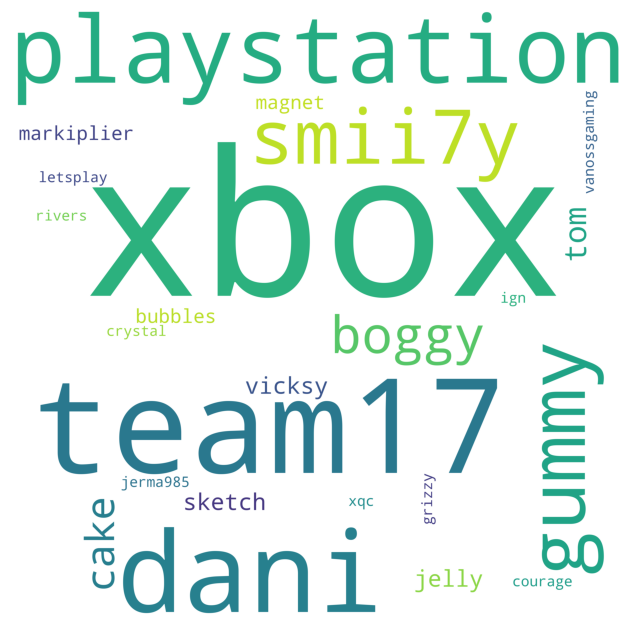

In [68]:
all_mentions_reddit = ""
for red_ytbr in general_reddit_yt_dict.keys():
    for i in range(general_reddit_yt_dict[red_ytbr]):
        all_mentions_reddit = all_mentions_reddit + (red_ytbr +" ")


reddit_cloud = WordCloud(width=4000, height=4000, 
                       background_color='white',
                       min_font_size=10, collocations=False).generate(all_mentions_reddit)

plt.figure(figsize=(8,8))
plt.imshow(reddit_cloud)
plt.axis("off")
plt.show()
#all_mentions_reddit

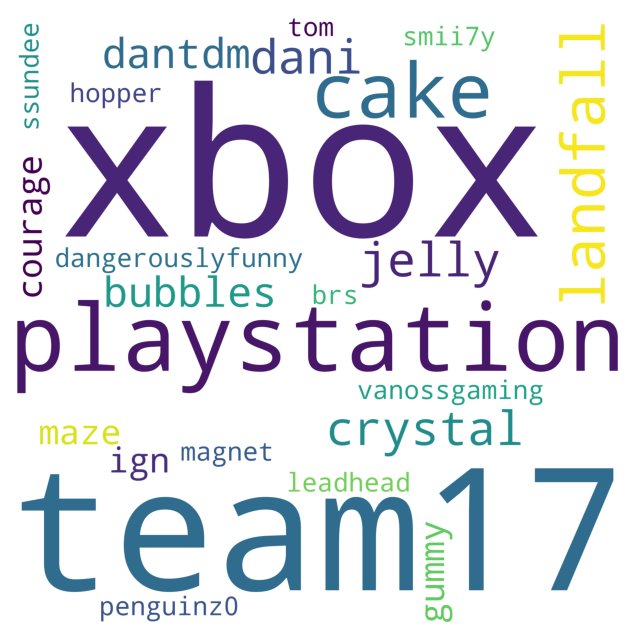

In [69]:
all_mentions_steam = " "
for ste_ytbr in steam_yt_data_scraped.keys():
    for i in range(steam_yt_data_scraped[ste_ytbr]):
        all_mentions_steam = all_mentions_steam + (ste_ytbr +" ")


steam_cloud = WordCloud(width=4000, height=4000, 
                       background_color='white',
                       min_font_size=10, 
                       collocations=False).generate(all_mentions_steam)

plt.figure(figsize=(8,8))
plt.imshow(steam_cloud)
plt.axis("off")
plt.show()

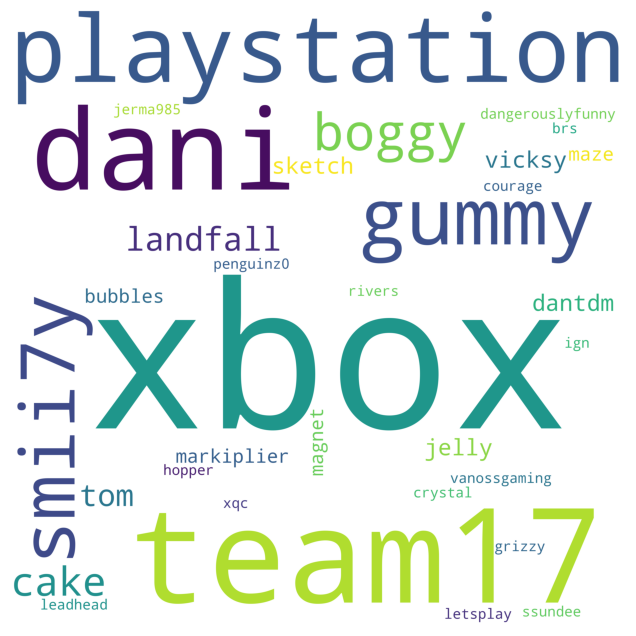

In [70]:

all_mentions_total = " "

all_mentions_dict = steam_yt_data_scraped
all_mentions_dict.update(general_reddit_yt_dict)

for ytbr in all_mentions_dict.keys():
    for i in range(all_mentions_dict[ytbr]):
        all_mentions_total = all_mentions_total + (ytbr +" ")


full_cloud = WordCloud(width=4000, height=4000, 
                       background_color='white',
                       min_font_size=10, 
                       collocations=False).generate(all_mentions_total)

plt.figure(figsize=(8,8))
plt.imshow(full_cloud)
plt.axis("off")
plt.show()

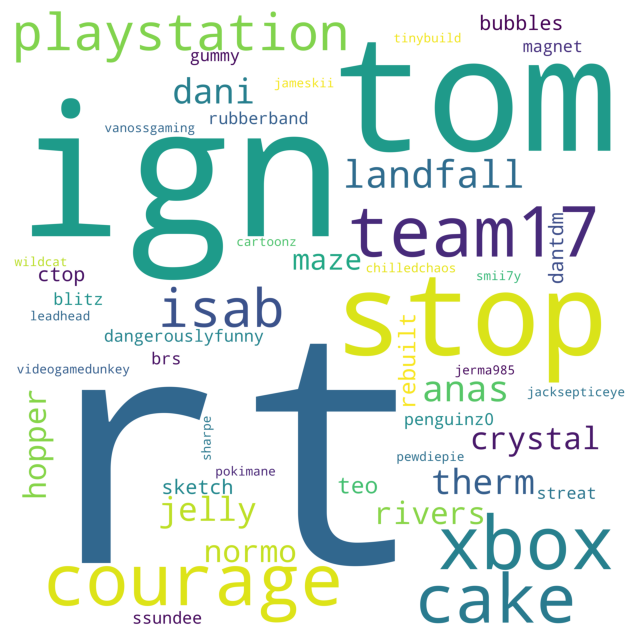

In [78]:
all_mentions_steam = " "
for ste_ytbr in steam_further_search.keys():
    for i in range(steam_further_search[ste_ytbr]):
        all_mentions_steam = all_mentions_steam + (ste_ytbr +" ")


steam_cloud = WordCloud(width=4000, height=4000, 
                       background_color='white',
                       min_font_size=10, 
                       collocations=False).generate(all_mentions_steam)

plt.figure(figsize=(8,8))
plt.imshow(steam_cloud)
plt.axis("off")
plt.show()